In [2]:
from google.colab import files
uploaded = files.upload()

Saving pone.0247672.s002.sav to pone.0247672.s002.sav


In [3]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.4 MB/s eta 0:00:00


In [4]:
import pyreadstat
import pandas as pd

sav_filename = "pone.0247672.s002.sav"

# Read the .sav file
df, meta = pyreadstat.read_sav(sav_filename)

# Save it as a CSV
csv_filename = "converted_file.csv"
df.to_csv(csv_filename, index=False)

In [5]:
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()

Saving biochem dataset.csv to biochem dataset.csv


In [8]:
df = pd.read_csv('biochem dataset.csv')

# Display first few rows
df.head()

,Age,GenderEx,MariStaEx,EduEx,EmployEX,StateEx,LGAEx,ReliEx,Gender,MaritalStatus,...,Phosphorus,Urea,Uric,TotalProtein,Globulin,Sodium,Potassium,Chloride,Ggt,Remarks
0,18.0,Male,Single,Completed Secondary,Unemployed,Gombe,Shomgom,Christianity,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.0,Male,Single,Completed Secondary,Unemployed,Gombe,Yamaltu-Deba,Islam,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,Female,Single,Completed Secondary,Unemployed,Gombe,Shomgom,Christianity,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20.0,Male,Single,Completed Secondary,Unemployed,Gombe,Shomgom,Christianity,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.0,Male,Single,Completed Secondary,Unemployed,Gombe,Billiri,Christianity,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe(include='all'))


Dataset shape: (7797, 40)

Data types:
 Age                  float64
GenderEx              object
MariStaEx             object
EduEx                 object
EmployEX              object
StateEx               object
LGAEx                 object
ReliEx                object
Gender               float64
MaritalStatus        float64
LevelEducation       float64
EmploymentStatus     float64
State                float64
LGA                  float64
Religion             float64
Albumin              float64
AlkalinePhos         float64
Alt                  float64
Ast                  float64
Amylase              float64
TotalBilirubin       float64
DirectBilirubin      float64
IndirectBilirubin    float64
Calcium              float64
TotalChol            float64
HdlChol              float64
LdlChol              float64
Triglycerides        float64
Creatine             float64
Lactate              float64
Phosphorus           float64
Urea                 float64
Uric                 float64
Tot

In [10]:
missing_percent = df.isnull().sum() / len(df) * 100
cols_to_drop = missing_percent[missing_percent > 70].index
df = df.drop(columns=cols_to_drop)

# Fill numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Remove duplicates
df = df.drop_duplicates()

# Standardize categorical values
df['GenderEx'] = df['GenderEx'].str.strip().str.title()
df['MariStaEx'] = df['MariStaEx'].str.strip().str.title()
df['EduEx'] = df['EduEx'].str.strip().str.title()

# Handle outliers
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

for col in num_cols:
    if df[col].nunique() > 10:
        df = handle_outliers(df, col)

# Convert data types
binary_cols = ['Gender', 'MaritalStatus']
for col in binary_cols:
    df[col] = df[col].astype('int')

cat_cols_to_convert = ['GenderEx', 'MariStaEx', 'EduEx', 'EmployEX', 'StateEx', 'LGAEx', 'ReliEx']
for col in cat_cols_to_convert:
    df[col] = df[col].astype('category')

# Save cleaned data
df.to_csv('cleaned_biochem_dataset.csv', index=False)
print("\nCleaning completed. Data saved to 'cleaned_biochem_dataset.csv'")


Cleaning completed. Data saved to 'cleaned_biochem_dataset.csv'


Sample of cleaned data:


,Age,GenderEx,MariStaEx,EduEx,EmployEX,StateEx,LGAEx,ReliEx,Gender,MaritalStatus,...,Lactate,Phosphorus,Urea,Uric,TotalProtein,Globulin,Sodium,Potassium,Chloride,Ggt
0,18.0,Male,Single,Completed Secondary,Unemployed,Gombe,Shomgom,Christianity,1,1,...,3.3,1.29,3.6,274.0,79.3,33.0,132.8,4.0,92.8,22.0
1,19.0,Male,Single,Completed Secondary,Unemployed,Gombe,Yamaltu-Deba,Islam,1,1,...,3.3,1.29,3.6,274.0,79.3,33.0,132.8,4.0,92.8,22.0
2,19.0,Female,Single,Completed Secondary,Unemployed,Gombe,Shomgom,Christianity,2,1,...,3.3,1.29,3.6,274.0,79.3,33.0,132.8,4.0,92.8,22.0
3,20.0,Male,Single,Completed Secondary,Unemployed,Gombe,Shomgom,Christianity,1,1,...,3.3,1.29,3.6,274.0,79.3,33.0,132.8,4.0,92.8,22.0
4,20.0,Male,Single,Completed Secondary,Unemployed,Gombe,Billiri,Christianity,1,1,...,3.3,1.29,3.6,274.0,79.3,33.0,132.8,4.0,92.8,22.0


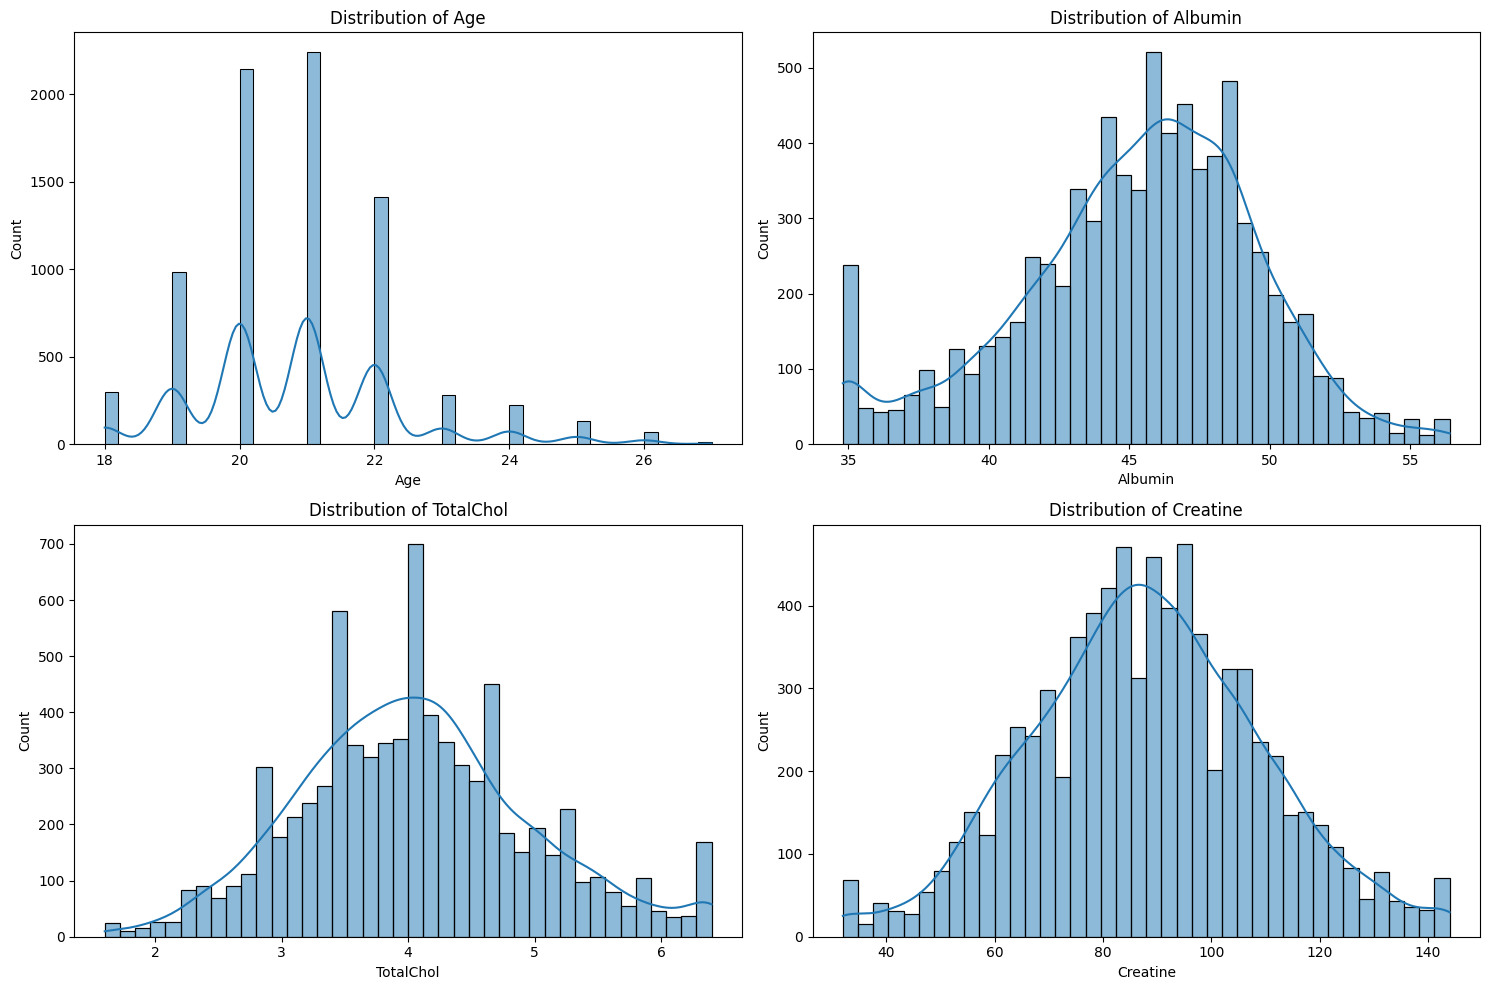

In [11]:
print("Sample of cleaned data:")
display(df.head())

# Check distributions of key variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Albumin', 'TotalChol', 'Creatine']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [12]:
df.to_csv('cleaned_biochem_dataset.csv', index=False)

!ls -l cleaned_biochem_dataset.csv

-rw-r--r-- 1 root root 1686075 May  8 23:06 cleaned_biochem_dataset.csv


In [13]:
from google.colab import files

# Download the file to your local machine
files.download('cleaned_biochem_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>